# CS6140 Machine Learning: Assignment 4 (F22) (Total Points: 100)
## Prof. Ahmad Uzair

## 3. Gaussian Mixture Model (GMM) [30 Points]

## True Data Generation Instructions

Select a Gaussian Mixture Model as the true probability density function for 2-dimensional real-valued data synthesis. This GMM will have 4 components with different mean vectors, different covariance matrices, and different probability for each Gaussian to be selected as the generator for each sample.

Generate two data sets with independent identically distributed samples using this true GMM; these datasets will have 100 and 10000 samples respectively.

Note: You may use any library of your choice for all aspects of this question

In [165]:
'''Imports'''
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


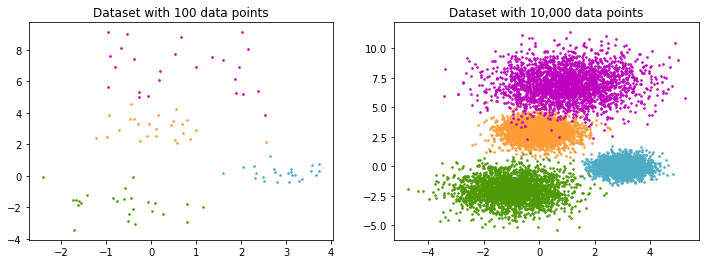

In [166]:

# Parameter values
mu = np.array([[3, 0], [0, 3], [-1, -2], [1, 7]])
sigma = np.array([0.5, 0.7, 1.0, 1.3])
weights = np.array([0.25, 0.2, 0.32, 0.43])

# Create data with 100 samples
x_true_100, y_true_100 = make_blobs(n_samples=100,
                  centers=mu, 
                  cluster_std=sigma,
                  random_state=2021)

# Create data with 10,000 samples
x_true_10k, y_true_10k = make_blobs(n_samples=10000,
                  centers=mu, 
                  cluster_std=sigma,
                  random_state=2021)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
types = ["spherical", "tied", "diag", "full"]

# Vizualize Datasets
fig, ax = plt.subplots(1,2, figsize=(12,4))

for k, col in enumerate(colors):
    cluster_data = y_true_100 == k
    plt.subplot(1,2,1)
    plt.title("Dataset with 100 data points")
    plt.scatter(x_true_100[cluster_data, 0], x_true_100[cluster_data, 1], c=col, marker=".", s=10)

for k, col in enumerate(colors):
    cluster_data = y_true_10k == k
    plt.subplot(1,2,2)
    plt.title("Dataset with 10,000 data points")
    plt.scatter(x_true_10k[cluster_data, 0], x_true_10k[cluster_data, 1], c=col, marker=".", s=10)


# Model Order Selection Using Cross-Validation
For each data set, using maximum likelihood parameter estimation principle (e.g. with the EM algorithm), within the framework of K-fold (e.g., 10-fold) cross-validation, evaluate GMMs with different model orders; specifically evaluate candidate GMMs with 1, 2, 3, 4, 5, 6, 7 Gaussian components. Note that both model parameter estimation and validation performance measures to be used is log-likelihood of data.

Repeat the experiment multiple times (e.g., at least 30 times) and report your results (tables/figures), indicating the rate at which each of the the seven GMM orders get selected for each of the datasets you produced.

In [150]:
from sklearn.model_selection import cross_validate, KFold, ShuffleSplit
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split


# Function to create a matrix of log likelihoods. 
# Returns matrix with |components| columns, the values are log likelihoods, and |expCount| rows
# Parameters:  X=data matrix,  components=array of component counts,  expCount=number of experiments
def make_em(X, components, expCount):
    op = np.zeros([expCount, len(components)])
    # For each experiment:
    for exp in range(expCount):
        ll_matrix = np.zeros(len(components)) # initialize log likelihoods
        # For each n_components:
        for n in range(len(components)):
            # Create model
            model = GMM(n_components=components[n], covariance_type="full", random_state=12324)
            
            # Split data between training and test
            X_train, X_test, y_train, y_test = train_test_split(X[:,0].reshape(-1,1), X[:,1], test_size=0.2)
            
            # scale the data
            scaler = preprocessing.StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            
            # Fit model
            model.fit(X_train, y_train)
            
            # Calculate log likelihood on test data using 10-fold cross validation
            score = cross_val_score(model, X_test, y_test, cv=10)
            
            # Add log likelihood to ll
            ll_matrix[n] = np.mean(score)
                
        op[exp] = ll_matrix
           
    return op



Text(0.5, 1.0, 'Maximum Log Likelihoods - 100 data points')

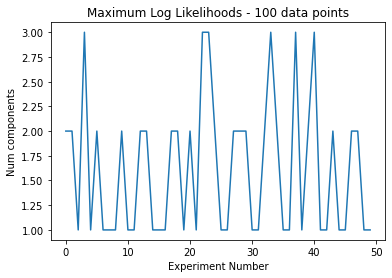

In [173]:
'''Evalaute GMM using dataset with 100 data points'''

from importlib import reload


numTests = 50
components=np.array([1,2,3,4,5,6,7])

# Create a matrix of EM log likelihoods
EM = make_em(x_true_100, components, numTests)

# Create a matrix with the # of components corresponding to the maximum log likelihood
maxEM = np.zeros([numTests])
for exp in range(len(EM)):
    max = np.argmax(EM[exp])
    maxEM[exp] = components[max]

# Plot the results
plt = reload(plt)
plt.plot(np.array(list(range(numTests))), maxEM)
plt.ylabel("Num components")
plt.xlabel("Experiment Number")
plt.title("Maximum Log Likelihoods - 100 data points")

Based on the above 50 experiments, the EM occurs most frequently on 1 cluster(s)


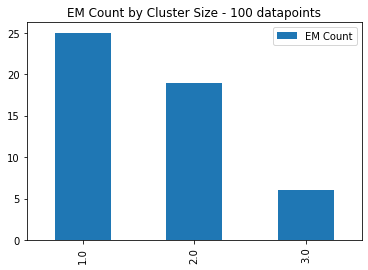

In [205]:
import statistics as st

df = pd.DataFrame(pd.value_counts(maxEM), columns=["EM Count"])
df.plot.bar(title="EM Count by Cluster Size - 100 datapoints")

print("Based on the above 50 experiments, the EM occurs most frequently on", int(st.mode(maxEM)), "cluster(s)")

Text(0.5, 1.0, 'Maximum Log Likelihoods - 10,000 data points')

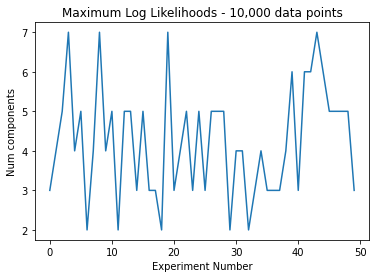

In [206]:
'''Evalaute GMM using dataset with 10,000 data points'''

from importlib import reload


numTests = 50
components=np.array([1,2,3,4,5,6,7])

# Create a matrix of EM log likelihoods
EM = make_em(x_true_10k, components, numTests)

# Create a matrix with the # of components corresponding to the maximum log likelihood
maxEM = np.zeros([numTests])
for exp in range(len(EM)):
    max = np.argmax(EM[exp])
    maxEM[exp] = components[max]

# Plot the results
plt = reload(plt)
plt.plot(np.array(list(range(numTests))), maxEM)
plt.ylabel("Num components")
plt.xlabel("Experiment Number")
plt.title("Maximum Log Likelihoods - 10,000 data points")

Based on the above 50 experiments, the EM occurs most frequently on 5 cluster(s)


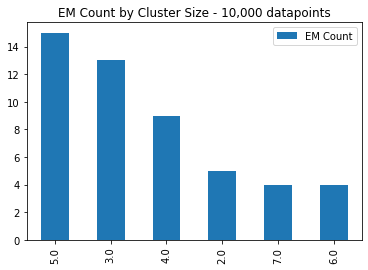

In [207]:
df = pd.DataFrame(pd.value_counts(maxEM), columns=["EM Count"])
df.plot.bar(title="EM Count by Cluster Size - 10,000 datapoints")

print("Based on the above 50 experiments, the EM occurs most frequently on", int(st.mode(maxEM)), "cluster(s)")